In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# dataset Iris
from sklearn import datasets

%matplotlib inline

In [2]:
def ScatterPlot(X , Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue'])
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
  plt.xlabel('Sepia Length')
  plt.ylabel('Sepia Width')

In [3]:
# import some data to play with
iris = datasets.load_iris()
x = iris.data[:, :2]  # we only take the first two features.
y = iris.target

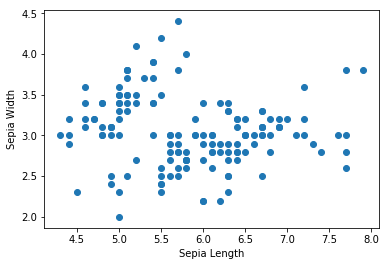

In [4]:
# original data without clustering
plt.scatter(x[:,0], x[:,1])
plt.xlabel('Sepia Length')
plt.ylabel('Sepia Width')

In [5]:
def input_fn():
    return tf.constant(np.array(x), tf.float32, x.shape),None

In [6]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=3, relative_tolerance=0.0001, random_seed=2)
kmeans.fit(input_fn=input_fn)

KMeansClustering(params={'mini_batch_steps_per_iteration': 1, 'training_initial_clusters': 'random', 'relative_tolerance': 0.0001, 'distance_metric': 'squared_euclidean', 'random_seed': 2, 'kmeans_plus_plus_num_retries': 2, 'use_mini_batch': True, 'num_clusters': 3})

In [7]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

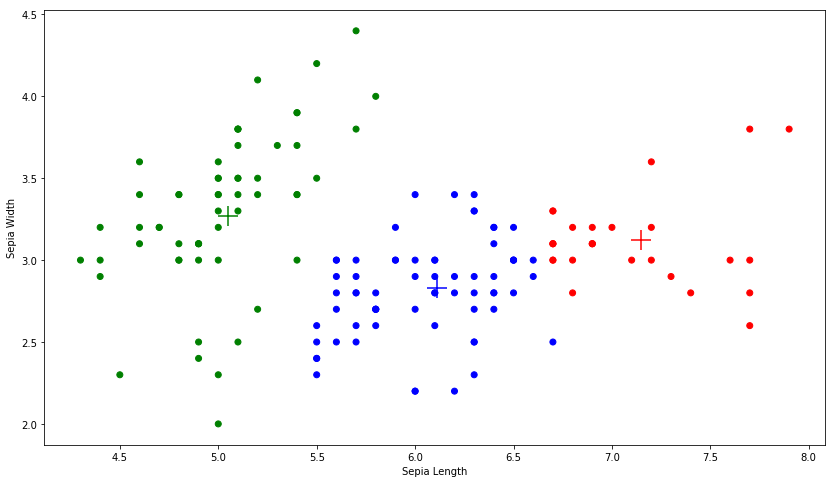

In [8]:
ScatterPlot(x[:,0], x[:,1], assignments, clusters)

In [9]:
SSE = kmeans.score(input_fn=input_fn, steps=100)
SSE*SSE

1514.6083

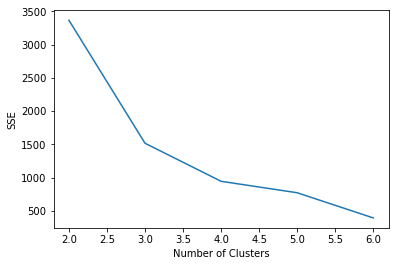

In [10]:
K = [2, 3, 4, 5, 6]
SSe = [3365.6772, 1515.8141, 943.30, 771.155, 392.64]
plt.plot(K,SSe)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')